## <font color='red'>60% skuteczności</font> 

In [2]:
#%load_ext autotime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
#Załadowanie danych - https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022, średnie oceny drużyn wg gry EA SPORTS FIFA
#w oparciu o mecze międzynarodowe od roku 1993
df_clean = pd.read_csv('international_matches.csv',index_col=0)
df = df_clean.loc[df_clean.tournament != 'Friendly'] #usuwam mecze towarzyskie - najczęściej niemiarodajne
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,South America,South America,70,19,0,0,0,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1993-08-15,Australia,Canada,Oceania,North America,52,46,0,0,2,...,Yes,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2


In [4]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [5]:
df.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [6]:
#wybieram kolumny do analizy i pozbywam się wierszy z brakami danych
df1 = df[['home_team','away_team', 'home_team_fifa_rank','away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'home_team_result']].copy()
df1.dropna(inplace=True)

In [7]:
#z danych wybieram tylko mecze dotyczące drużyn obecnych na mundialu 2022
mundial = ['Qatar','Ecuador','Senegal','Netherlands',
           'England','IR Iran','USA','Wales',
           'Argentina','Saudi Arabia','Poland','Mexico',
           'France','Australia','Denmark','Tunisia',
           'Spain','Costa Rica','Germany','Japan',
           'Belgium','Canada','Morocco','Croatia',
           'Brazil','Serbia','Switzerland','Cameroon',
           'Portugal','Ghana','Uruguay','Korea Republic']
df1 = df1[df1['home_team'].isin(mundial)|df1['away_team'].isin(mundial)]

In [8]:
df1.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score',
       'home_team_result'],
      dtype='object')

In [9]:
#kategoryzowanie zmiennej celu w nowej kolumnie: 1-wygrana dryżuny pierwszej, 0-porażka lub remis tej drużyny
df1.loc[df1.home_team_result =='Win', 'result'] = 1
df1.loc[df1.home_team_result =='Lose', 'result'] = 0
df1.loc[df1.home_team_result =='Draw', 'result'] = 0

df1 = df1.iloc[:, [0,1,4,6,7,8,2,5,9,10,11,12,13,3]] #ustalenie porządku kolumn
df1

,home_team,away_team,home_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,home_team_fifa_rank,away_team_goalkeeper_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_team_result,result,away_team_fifa_rank
8266,Austria,England,83.0,76.2,73.0,74.0,90,88.0,90.5,88.7,91.2,Draw,0.0,7
8271,Croatia,Hungary,77.0,80.5,78.7,79.0,25,74.0,71.8,75.7,70.2,Win,1.0,76
8283,Morocco,Tunisia,68.0,75.2,73.7,71.0,33,51.0,67.5,71.0,72.5,Draw,0.0,36
8284,Northern Ireland,Poland,84.0,71.8,65.7,74.8,109,83.0,78.0,80.3,78.0,Lose,0.0,29
8313,Bosnia and Herzegovina,Spain,62.0,72.2,74.3,70.8,69,94.0,86.5,89.3,89.5,Draw,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,England,Hungary,83.0,85.0,88.0,84.0,5,85.0,75.5,72.7,73.0,Lose,0.0,40
23907,Germany,Italy,90.0,84.0,82.7,87.8,12,89.0,84.2,85.3,84.5,Win,1.0,6
23908,Netherlands,Wales,81.0,85.2,83.0,83.5,10,74.0,75.0,73.0,78.5,Win,1.0,18
23909,Poland,Belgium,87.0,75.2,84.7,75.8,26,89.0,80.8,85.7,85.5,Lose,0.0,2


In [10]:
df1 = df1.drop('home_team_result', axis=1) #pozbycie się starej zmiennej celu

# reg logistyczna

In [11]:
#podział na zbiór treningowy i testowy
X = df1.drop(['result', 'home_team', 'away_team'], axis=1)
y = df1['result']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [13]:
model = LogisticRegression(max_iter=1000, random_state=2022)

In [14]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=2022)

In [15]:
predictions = model.predict(X_test)
predictions_train = model.predict(X_train)

## Diagnoza zbudowanej regresji

In [16]:
#Błędy modelu - zbiór treningowy
print(
  'mean_squared_error : ', mean_squared_error(y_train, predictions_train))
print(
  'mean_absolute_error : ', mean_absolute_error(y_train, predictions_train))

mean_squared_error :  0.3060897435897436
mean_absolute_error :  0.3060897435897436


In [17]:
#Błędy modelu - zbiór testowy
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.33271028037383177
mean_absolute_error :  0.33271028037383177


In [18]:
#model.coef_

In [19]:
#Ocena modelu - train
model.score(X_train,y_train)

0.6939102564102564

In [20]:
#Ocena modelu - test
model.score(X_test,y_test)

0.6672897196261682

In [21]:
print(confusion_matrix(y_train,predictions_train))
print(classification_report(y_train,predictions_train))

[[476 182]
 [200 390]]
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71       658
         1.0       0.68      0.66      0.67       590

    accuracy                           0.69      1248
   macro avg       0.69      0.69      0.69      1248
weighted avg       0.69      0.69      0.69      1248



In [22]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[202  86]
 [ 92 155]]
              precision    recall  f1-score   support

         0.0       0.69      0.70      0.69       288
         1.0       0.64      0.63      0.64       247

    accuracy                           0.67       535
   macro avg       0.67      0.66      0.66       535
weighted avg       0.67      0.67      0.67       535



# sieć neuronowa

In [23]:
scaler = StandardScaler()

In [24]:
#Skalowanie danych przed wdrożeniem sieci
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [25]:
#Dobór najlepszych współczynników metodą GridSearchCV()

# mlp_gs = MLPClassifier(max_iter=1000, random_state=55)
# parameter_space = {
#     'hidden_layer_sizes': [(10,10,10),(10,),(20,20,20),(20,),(30,),(30,30),(30,30,30)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam', 'lbfgs'],
#     'alpha': [0.0001, 0.05, 0.01],
#     'learning_rate': ['constant','adaptive'],
# }

# clf1 = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5, scoring='accuracy')
# clf1.fit(X_train, y_train) # X is train samples and y is the corresponding labels
# print('Best parameters found:\n', clf1.best_params_)
# print(clf1.best_score_)

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='sgd', max_iter=2000, alpha = 0.01, learning_rate = 'constant', random_state=55)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

## Diagnoza zbudowanej sieci

In [27]:
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[457 201]
 [192 398]]
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       658
         1.0       0.66      0.67      0.67       590

    accuracy                           0.69      1248
   macro avg       0.68      0.68      0.68      1248
weighted avg       0.69      0.69      0.69      1248



In [28]:
#Błędy modelu - zbiór treningowy
print(
  'mean_squared_error : ', mean_squared_error(y_train, predict_train))
print(
  'mean_absolute_error : ', mean_absolute_error(y_train, predict_train))

mean_squared_error :  0.31490384615384615
mean_absolute_error :  0.31490384615384615


In [29]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[201  87]
 [ 84 163]]
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.70       288
         1.0       0.65      0.66      0.66       247

    accuracy                           0.68       535
   macro avg       0.68      0.68      0.68       535
weighted avg       0.68      0.68      0.68       535



In [30]:
#Błędy modelu - zbiór testowy
print(
  'mean_squared_error : ', mean_squared_error(y_test, predict_test))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predict_test))

mean_squared_error :  0.31962616822429907
mean_absolute_error :  0.31962616822429907


In [31]:
#Ocena modelu - train
mlp.score(X_train,y_train)

0.6850961538461539

In [32]:
#Ocena modelu - test
mlp.score(X_test,y_test)

0.680373831775701

# Znajdowanie indywidualnych statystyk drużyn grających na mundialu 2022

In [33]:
df2 = df[['date','home_team','away_team', 'home_team_fifa_rank','away_team_fifa_rank',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score']].copy()
df2

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,59,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,35,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,67,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-08-08,Peru,Colombia,70,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1993-08-15,Australia,Canada,52,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23915,2022-06-14,Turkey,Lithuania,43,138,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,180,153,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,192,135,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,28,60,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2


In [34]:
#Szukanie najnowszych statystyk wszystkich drużyn
home = df2[['date','home_team','home_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 
                                                                             'home_team_goalkeeper_score':'goalkeeper_score', 
                                                                             'home_team_mean_defense_score':'defense_score', 
                                                                             'home_team_mean_offense_score':'offense_score',
                                                                             'home_team_mean_midfield_score':'midfield_score'})
away = df2[['date','away_team','away_team_goalkeeper_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score']].rename(columns = {'away_team': 'team',
                                                          'home_team_goalkeeper_score':'goalkeeper_score', 
                                                          'home_team_mean_defense_score':'defense_score', 
                                                          'home_team_mean_offense_score':'offense_score',
                                                          'home_team_mean_midfield_score':'midfield_score'})
df2 = home.append(away).drop(['away_team_goalkeeper_score','away_team_mean_defense_score', 'away_team_mean_offense_score','away_team_mean_midfield_score'], axis=1)
df2.dropna(inplace=True)

In [35]:
df2 = df2.sort_values(['team', 'date'], ascending=[True, False])
df2['row_number'] = df2.groupby('team').cumcount()+1
df2_final = df2[df2['row_number']==1].drop(['row_number','date'],axis=1)
df2_final

,team,goalkeeper_score,defense_score,offense_score,midfield_score
23828,Albania,80.0,76.2,70.0,73.0
23706,Algeria,78.0,78.0,81.0,78.0
22414,Angola,68.0,75.5,70.7,68.5
23521,Argentina,84.0,82.2,89.0,84.0
23876,Australia,77.0,72.0,72.3,73.5
...,...,...,...,...,...
23911,Ukraine,75.0,74.8,78.7,80.0
23582,United Arab Emirates,70.0,63.0,64.3,67.0
23499,Uruguay,80.0,81.2,84.3,80.0
23589,Venezuela,73.0,72.8,76.3,77.8


<AxesSubplot:>

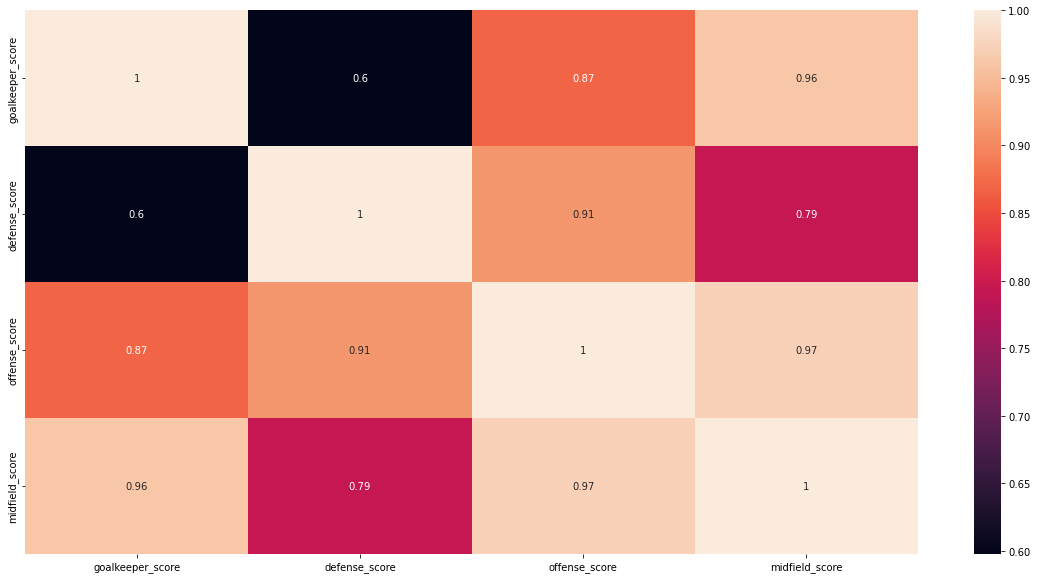

In [36]:
#Korelacja statystyk w postaci heatmapy
plt.figure(figsize=(20,10)) 
sns.heatmap(df2_final[1:5].corr(), annot= True)

In [37]:
#Szukanie najnowszych pozycji w rankingu FIFA
rank = df_clean[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home1 = rank[['date', 'home_team','home_team_fifa_rank']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank'})
away1 = rank[['date', 'away_team','away_team_fifa_rank']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank'})
rank = home1.append(away1)

In [38]:
rank  = rank.sort_values(['team', 'date'], ascending=[True, False])
rank['row_number'] = rank.groupby('team').cumcount()+1
rank_final = rank[rank['row_number']==1].drop(['row_number','date'],axis=1)
rank_final

,team,rank
23897,Afghanistan,150
23889,Albania,66
23875,Algeria,44
21368,American Samoa,190
23916,Andorra,153
...,...,...
23666,Vietnam,96
23908,Wales,18
23894,Yemen,151
23763,Zambia,87


In [39]:
# mundial = ['Qatar','Ecuador','Senegal','Netherlands',
#            'England','IR Iran','USA','Wales',
#            'Argentina','Saudi Arabia','Poland','Mexico',
#            'France','Australia','Denmark','Tunisia',
#            'Spain','Costa Rica','Germany','Japan',
#            'Belgium','Canada','Morocco','Croatia',
#            'Brazil','Serbia','Switzerland','Cameroon',
#            'Portugal','Ghana','Uruguay','Korea Republic']
df2_final = df2_final[df2_final['team'].isin(mundial)]
rank_final = rank_final[rank_final['team'].isin(mundial)].reset_index(drop=True)

In [40]:
#Brak statystyk dla Qataru - wypełnienie aktualnymi statystykami z gry EA Sports FIFA
qtr = {'team': 'Qatar',
        'goalkeeper_score': 68,
        'defense_score': 68,
        'offense_score': 73.3,
        'midfield_score': 71.5}
df2_final = df2_final.append(qtr, ignore_index=True)

In [41]:
df2_final = df2_final.sort_values('team').reset_index(drop=True)

In [42]:
#dodanie kolumn - kadencja trenera oraz średnia wartość zawodnika w zespole(Transfermarkt)
coach = [4.25,4.33,6.25,6.42,0.67,4.83,1.42,5.08,2.25,2.17,6.08,10.33,1.25,0.75,0.17,4.25,4.25,3.83,0.17,1.25,0.75,8.08,5.33,3.25,7.67,1.67,3,1.25,0.75,3.92,0.83,0.42]
mean_value = [24.82,1.43,21.66,43.92,5.96,7.20,0.721,14.50,13.58,5.63,48.46,39.90,34.06,8.34,2.38,5.92,6.11,6.77,9.27,22.59,9.83,36.04,0.573,0.969,8.83,13.83,33.73,10.81,2.40,10.67,17.30,6.16]

In [43]:
#Ostateczny df z aktualnymi statystykami wszystkich obecnych na mundialu drużyn
rank_final = rank_final.drop('team', axis=1)
druzyny = pd.concat([df2_final,rank_final],axis=1)
druzyny["coach"] = coach
druzyny["mean_value"] = mean_value
druzyny

,team,goalkeeper_score,defense_score,offense_score,midfield_score,rank,coach,mean_value
0,Argentina,84.0,82.2,89.0,84.0,4,4.25,24.820
1,Australia,77.0,72.0,72.3,73.5,42,4.33,1.430
2,Belgium,89.0,80.8,85.7,85.5,2,6.25,21.660
3,Brazil,89.0,84.8,86.3,85.5,1,6.42,43.920
4,Cameroon,67.0,76.8,77.7,75.0,37,0.67,5.960
5,Canada,76.0,69.2,73.0,78.0,38,4.83,7.200
6,Costa Rica,88.0,71.5,70.3,69.2,31,1.42,0.721
7,Croatia,82.0,77.8,76.7,84.2,16,5.08,14.500
8,Denmark,85.0,80.2,77.7,80.2,11,2.25,13.580
9,Ecuador,71.0,73.5,76.0,74.5,46,2.17,5.630


In [56]:
#druzyny.to_csv('teams.csv')

In [45]:
#Korelacja statystyk dla tych drużyn - w postaci df
#druzyny[1:6].corr().unstack().reset_index().rename(columns={0:"korelacja"})

<AxesSubplot:>

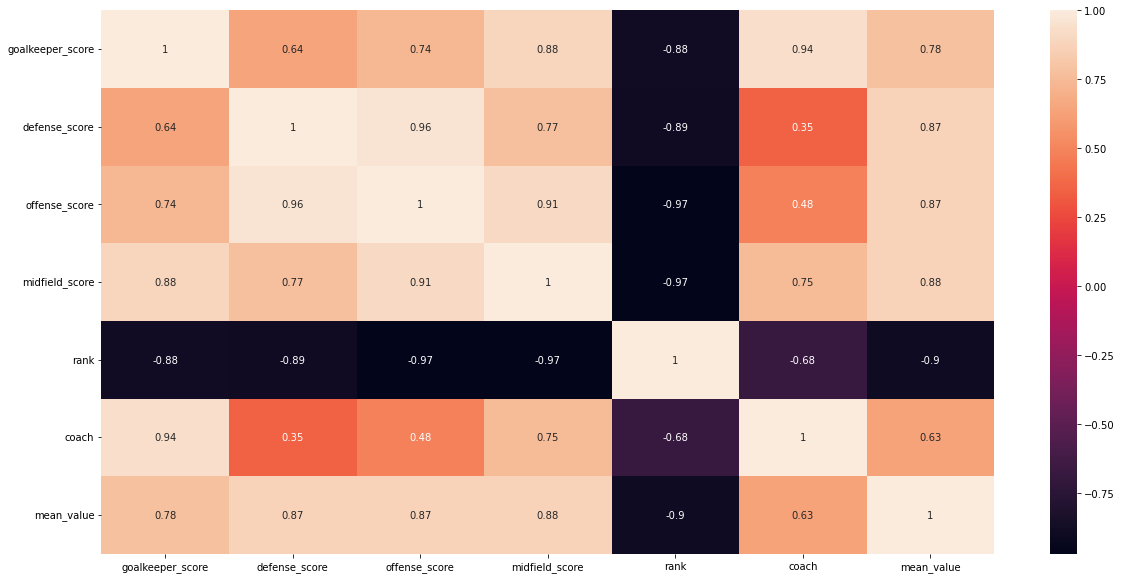

In [46]:
#Korelacja statystyk dla tych drużyn - ponownie w postaci heatmapy
plt.figure(figsize=(20,10)) 
sns.heatmap(druzyny[1:6].corr(), annot= True)

# Sprawdzanie modelu regresji logistycznej

In [47]:
#Wyznacznie pary meczowej i jej statystyki
para = ['Qatar','Ecuador']
mecz = druzyny.loc[druzyny['team'].isin(para)]
mecz

,team,goalkeeper_score,defense_score,offense_score,midfield_score,rank,coach,mean_value
9,Ecuador,71.0,73.5,76.0,74.5,46,2.17,5.630
22,Qatar,68.0,68.0,73.3,71.5,52,5.33,0.573


In [48]:
team1 = mecz.loc[mecz.team == para[0], ['goalkeeper_score','defense_score','offense_score','midfield_score','rank']].values.flatten().tolist()
team2 = mecz.loc[mecz.team == para[1], ['goalkeeper_score','defense_score','offense_score','midfield_score','rank']].values.flatten().tolist()
stats = team1 + team2
stats2 = team2 + team1

In [49]:
#Prawdopodobieństwo wygrania drużyny pierwszej(Qatar)
print(model.predict_proba(np.array([stats])))
print(model.predict(np.array([stats])))

[[0.6356341 0.3643659]]
[0.]


In [50]:
#Prawdopodobieństwo wygrania drużyny pierwszej(Ecuador)
print(model.predict_proba(np.array([stats2])))
print(model.predict(np.array([stats2])))

[[0.39744969 0.60255031]]
[1.]


## Jako, że sieć była bardziej stabilna między zbiorami treningowym, a testowym, to jej wyniki będą interpretowane w ramach predykcji 

### Predykcje

In [51]:
#Wyznacznie pary meczowej i jej statystyki
para = ['Cameroon','Brazil']
mecz = druzyny.loc[druzyny['team'].isin(para)]
mecz

,team,goalkeeper_score,defense_score,offense_score,midfield_score,rank,coach,mean_value
3,Brazil,89.0,84.8,86.3,85.5,1,6.42,43.92
4,Cameroon,67.0,76.8,77.7,75.0,37,0.67,5.96


In [52]:
team1 = mecz.loc[mecz.team == para[0], ['goalkeeper_score','defense_score','offense_score','midfield_score','rank']].values.flatten().tolist()
team2 = mecz.loc[mecz.team == para[1], ['goalkeeper_score','defense_score','offense_score','midfield_score','rank']].values.flatten().tolist()
stats = team1 + team2
stats2 = team2 + team1

In [53]:
stats = scaler.transform(np.array([stats]))
stats2 = scaler.transform(np.array([stats2]))

In [54]:
#Prawdopodobieństwo wygrania drużyny pierwszej(team1)
print(mlp.predict_proba(stats))
print(mlp.predict(stats))
print('Mecz: '+para[0]+' vs. '+para[1])
if mlp.predict(stats)[0] == 1:
    print('Wygra: '+para[0])
elif mlp.predict(stats)[0] == 0:
    print('Remis lub Wygra: '+para[1])

[[0.87843828 0.12156172]]
[0.]
Mecz: Cameroon vs. Brazil
Remis lub Wygra: Brazil


In [55]:
#Prawdopodobieństwo wygrania drużyny pierwszej(team2)
print(mlp.predict_proba(stats2))
print(mlp.predict(stats2))
print('Mecz: '+para[1]+' vs. '+para[0])
if mlp.predict(stats2)[0] == 1:
    print('Wygra: '+para[1])
elif mlp.predict(stats2)[0] == 0:
    print('Remis lub Wygra: '+para[0])

[[0.22368317 0.77631683]]
[1.]
Mecz: Brazil vs. Cameroon
Wygra: Brazil


### W przypadku pojawienia się dwóch predykcji 'Remis lub..', bądź predykcji dwóch różnych wygranych, wybierany jest remis (przynajmniej na czas trwania fazy grupowej)